### Random Forest - Label Classification

In [9]:
import sys
sys.path.append('../../')

# Import libraries
import pandas as pd
from utils.load import load
from utils.score import fold_cross_validate, visualize_classification_result, visualize_feature_importance
from utils.print import print_cross_validation_scores, print_scores
from constant.columns import FEATURES, LABEL

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [10]:
# Import data
df = pd.read_csv('./source/dataset.csv')
X, y = df[FEATURES], df[LABEL]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#### Cross Validation

In [11]:
# Define the model
clf_cv = RandomForestClassifier()
scores = fold_cross_validate(clf_cv, X, y)

# Print scores
print_cross_validation_scores(scores)

MACRO:
Precision: 0.9090 (0.1537)
Recall: 0.9100 (0.1414)
F1 score: 0.9044 (0.1425)
---------------------------------
MICRO:
Precision: 0.9870 (0.0122)
Recall: 0.9870 (0.0122)
F1 score: 0.9870 (0.0122)


#### Feature Importance

C:\Users\dell\AppData\Local\Temp\ipykernel_16644\3608106029.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


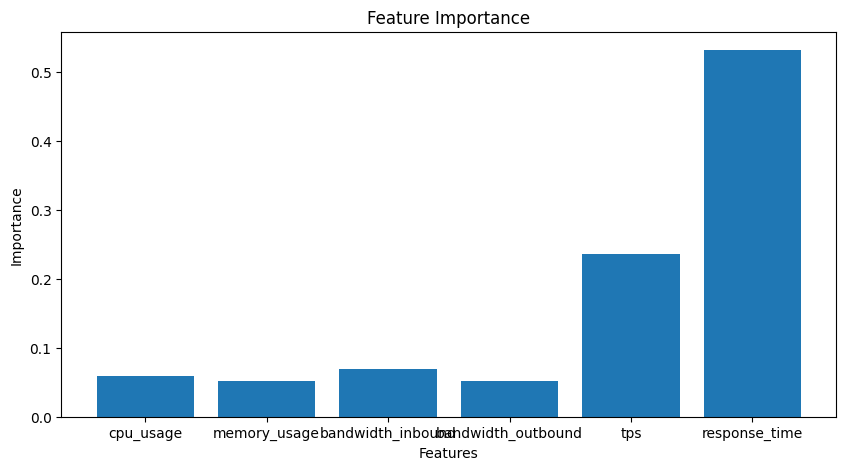

In [12]:
# Create a decision tree classifier and fit it to the training data
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Get the feature importances
importance = clf.feature_importances_
visualize_feature_importance(importance, FEATURES)

### Train the model

In [13]:
# Create and train the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

C:\Users\dell\AppData\Local\Temp\ipykernel_16644\3190882598.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier()

In [14]:
# Predict and print the score
y_pred = clf.predict(X_test)
print_scores(y_test, y_pred)

Accuracy: 0.9838337182448037
Precision: 0.9259259259259259
Recall: 0.8333333333333334
F1: 0.8771929824561403


#### Visualize Result

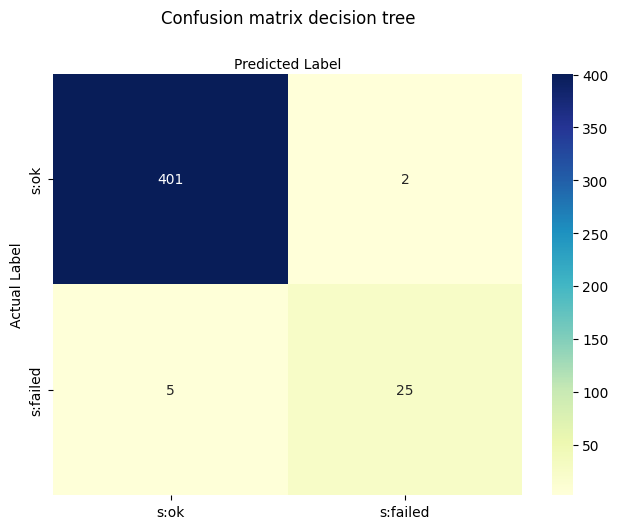

In [15]:
visualize_classification_result(y_test, y_pred)